In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sys

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sys.path.append('/content')

In [ ]:
data_file1 =  "train.csv"
train = pd.read_csv(data_file1)
train.head()

,ID,Province_State,Date,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,0,Alabama,04-12-2020,3563,93,NaN,3470.0,75.988020,21583.0,437.0,2.610160,460.300152,12.264945
1,1,Alaska,04-12-2020,272,8,66.0,264.0,45.504049,8038.0,31.0,2.941176,1344.711576,11.397059
2,2,Arizona,04-12-2020,3542,115,NaN,3427.0,48.662422,42109.0,NaN,3.246753,578.522286,NaN
3,3,Arkansas,04-12-2020,1280,27,367.0,1253.0,49.439423,19722.0,130.0,2.109375,761.753354,10.156250
4,4,California,04-12-2020,22795,640,NaN,22155.0,58.137726,190328.0,5234.0,2.812020,485.423869,22.961176


In [ ]:
train.corr(method='spearman')

,ID,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
ID,1.000000,0.459767,0.310859,0.521934,0.265742,0.699920,0.640155,0.378113,-0.282762,0.920026,-0.366991
Confirmed,0.459767,1.000000,0.944852,0.846062,0.909009,0.789621,0.927445,0.961591,0.185215,0.490726,0.046137
Deaths,0.310859,0.944852,1.000000,0.768643,0.887478,0.691861,0.846904,0.974543,0.474882,0.364541,0.285448
Recovered,0.521934,0.846062,0.768643,1.000000,0.596269,0.715843,0.849634,0.766537,0.104319,0.536295,-0.072914
Active,0.265742,0.909009,0.887478,0.596269,1.000000,0.650674,0.792486,0.907892,0.228473,0.294749,0.171564
Incident_Rate,0.699920,0.789621,0.691861,0.715843,0.650674,1.000000,0.742636,0.720557,0.003329,0.782848,-0.225468
People_Tested,0.640155,0.927445,0.846904,0.849634,0.792486,0.742636,1.000000,0.877763,0.083519,0.667108,-0.007044
People_Hospitalized,0.378113,0.961591,0.974543,0.766537,0.907892,0.720557,0.877763,1.000000,0.398195,0.447365,0.295148
Mortality_Rate,-0.282762,0.185215,0.474882,0.104319,0.228473,0.003329,0.083519,0.398195,1.000000,-0.187367,0.707264
Testing_Rate,0.920026,0.490726,0.364541,0.536295,0.294749,0.782848,0.667108,0.447365,-0.187367,1.000000,-0.330929


In [ ]:
df = pd.DataFrame(train)

#X = df.drop("",1)   #Feature Matrix
#y = df["Deaths"]          #Target Variable

df = df.drop(['Confirmed', 'ID'], axis=1)
df = df.replace(np.NaN, 0).dropna(axis=1)
corr_matrix = df.corr()
print(corr_matrix)

                        Deaths  Recovered  ...  Testing_Rate  Hospitalization_Rate
Deaths                1.000000   0.377924  ...      0.345898              0.137444
Recovered             0.377924   1.000000  ...      0.317542             -0.164700
Active                0.687528   0.143422  ...      0.324393             -0.010424
Incident_Rate         0.536329   0.431298  ...      0.721931             -0.128452
People_Tested         0.674389   0.413880  ...      0.497311             -0.112693
People_Hospitalized   0.856754   0.187234  ...      0.246015              0.381740
Mortality_Rate        0.492999   0.052682  ...     -0.060319              0.290391
Testing_Rate          0.345898   0.317542  ...      1.000000             -0.231493
Hospitalization_Rate  0.137444  -0.164700  ...     -0.231493              1.000000

[9 rows x 9 columns]


In [ ]:
#Find features that are more highly correlated for confirmed cases and then deaths 
gb = df.groupby('Province_State')

Alabama = gb.get_group("Alabama")
Alaska = gb.get_group("Alaska")
Arizona = gb.get_group("Arizona")
Arkansas = gb.get_group("Arkansas")
California = gb.get_group("California")
Colorado = gb.get_group("Colorado")
Connecticut = gb.get_group("Connecticut")
Delaware = gb.get_group("Delaware")
Florida = gb.get_group("Florida")
Georgia = gb.get_group("Georgia")
Hawaii = gb.get_group("Hawaii")
Idaho = gb.get_group("Idaho")
Illinois = gb.get_group("Illinois")
Indiana = gb.get_group("Indiana")
Iowa = gb.get_group("Iowa")
Kansas = gb.get_group("Kansas")
Kentucky = gb.get_group("Kentucky")
Louisiana = gb.get_group("Louisiana")
Maine = gb.get_group("Maine")
Maryland = gb.get_group("Maryland")
Massachusetts = gb.get_group("Massachusetts")
Michigan = gb.get_group("Michigan")
Minnesota = gb.get_group("Minnesota")
Mississippi = gb.get_group("Mississippi")
Missouri = gb.get_group("Missouri")
Montana = gb.get_group("Montana")
Nebraska = gb.get_group("Nebraska")
Nevada = gb.get_group("Nevada")
New_Hampshire = gb.get_group("New Hampshire")
New_Jersey = gb.get_group("New Jersey")
New_Mexico = gb.get_group("New Mexico")
New_York = gb.get_group("New York")
North_Carolina = gb.get_group("North Carolina")
North_Dakota = gb.get_group("North Dakota")
Ohio = gb.get_group("Ohio")
Oklahoma = gb.get_group("Oklahoma")
Oregon = gb.get_group("Oregon")
Pennsylvania = gb.get_group("Pennsylvania")
Rhode_Island = gb.get_group("Rhode Island")
South_Carolina = gb.get_group("South Carolina")
South_Dakota = gb.get_group("South Dakota")
Tennessee = gb.get_group("Tennessee")
Texas = gb.get_group("Texas")
Utah = gb.get_group("Utah")
Vermont = gb.get_group("Vermont")
Virginia = gb.get_group("Virginia")
Washington = gb.get_group("Washington")
West_Virginia = gb.get_group("West Virginia")
Wisconsin = gb.get_group("Wisconsin")
Wyoming = gb.get_group("Wyoming")

# print(Louisiana['Deaths'], Louisiana['Mortality_Rate'])

#Find datasets to add - population and effectiveness of quarantine

In [ ]:
list_states = [Alabama, 
Alaska,
Arizona,
Arkansas,
California,
Colorado,
Connecticut,
Delaware,
Florida,
Georgia,
Hawaii,
Idaho,
Illinois,
Indiana,
Iowa,
Kansas,
Kentucky,
Louisiana,
Maine,
Maryland,
Massachusetts,
Michigan,
Minnesota,
Mississippi,
Missouri,
Montana,
Nebraska,
Nevada,
New_Hampshire,
New_Jersey,
New_Mexico,
New_York,
North_Carolina,
North_Dakota,
Ohio,
Oklahoma,
Oregon,
Pennsylvania,
Rhode_Island,
South_Carolina,
South_Dakota,
Tennessee,
Texas,
Utah,
Vermont,
Virginia,
Washington,
West_Virginia,
Wisconsin,
Wyoming]


In [ ]:
list_state_names = ["Alabama", 
"Alaska",
"Arizona",
"Arkansas",
"California",
"Colorado",
"Connecticut",
"Delaware",
"Florida",
"Georgia",
"Hawaii",
"Idaho",
"Illinois",
"Indiana",
"Iowa",
"Kansas",
"Kentucky",
"Louisiana",
"Maine",
"Maryland",
"Massachusetts",
"Michigan",
"Minnesota",
"Mississippi",
"Missouri",
"Montana",
"Nebraska",
"Nevada",
"New_Hampshire",
"New_Jersey",
"New_Mexico",
"New_York",
"North_Carolina",
"North_Dakota",
"Ohio",
"Oklahoma",
"Oregon",
"Pennsylvania",
"Rhode_Island",
"South_Carolina",
"South_Dakota",
"Tennessee",
"Texas",
"Utah",
"Vermont",
"Virginia",
"Washington",
"West_Virginia",
"Wisconsin",
"Wyoming"]

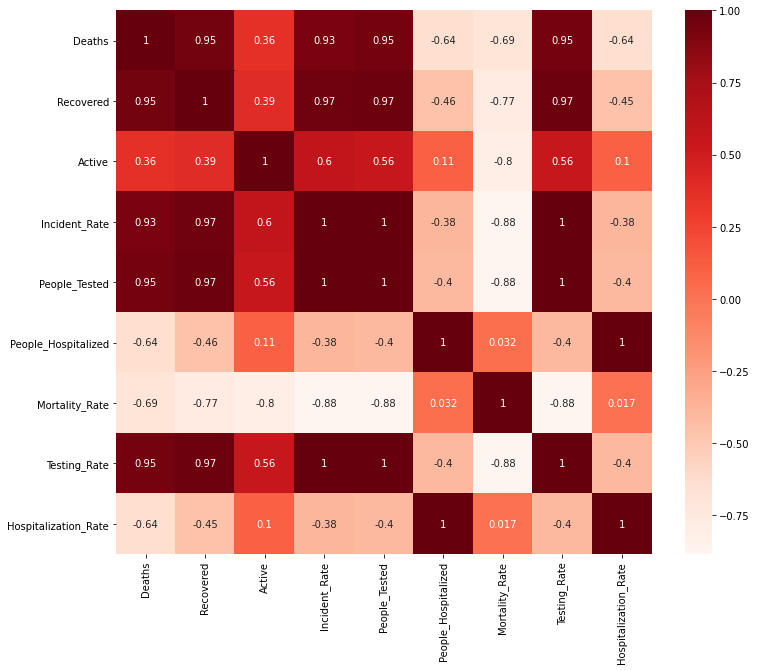

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
alaska_cor = list_states[17].corr()
sns.heatmap(alaska_cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
death_target = alaska_cor["Deaths"]
# print(death_target)
#Selecting highly correlated features
relevant_features = death_target[(death_target>0.75)][1:]
print(relevant_features)
#Compare relevant features to each other and remove highly correlated ones/dependant features 

Recovered        0.951286
Incident_Rate    0.928946
People_Tested    0.945868
Testing_Rate     0.945661
Name: Deaths, dtype: float64


In [ ]:
#Correlation among relevant features 
#print(list_states[4])
california_cor = list_states[4].corr()
cor_t = california_cor["Deaths"]
# print(cor_t)
#Selecting highly correlated features
relevant_features_cali = cor_t[(cor_t>0.75)][1:]
print(relevant_features_cali)
# print(str(list(relevant_features_cali.keys())[0]))
# relevant_features_cali = relevant_features_cali.drop(str(list(relevant_features_cali.keys())[0]))
# print(relevant_features_cali)
# print(df[["Recovered","Active"]].corr())
# print(df[["Incident_Rate","Recovered"]].corr())
# print(df[["People_Tested","Recovered"]].corr())
# print(df[["Testing_Rate","Recovered"]].corr())
# for i in range(len(relevant_features)):
#   #for j in range(len(relevant_features)):
#   print(df[[str(list(relevant_features.keys())[i]),str(list(relevant_features.keys())[j])]].corr())

Active           0.983859
Incident_Rate    0.984290
People_Tested    0.992111
Testing_Rate     0.992086
Name: Deaths, dtype: float64


In [ ]:
print(relevant_features_cali)
# new_features 
# for i in range(len(iterate_features) - 1):
#   for j in range(i+1, len(iterate_features)):
#     val = corr_matrix[str(list(iterate_features.keys())[i])][str(list(iterate_features.keys())[j])]
#     print(str(list(iterate_features.keys())[i]))
#     print(str(list(iterate_features.keys())[j]))
#     print(val)
#     if val > 0.6:
#       relevant_features_cali = relevant_features_cali.drop(str(list(iterate_features.keys())[j]))
#print(relevant_features_cali)

Active           0.983859
Incident_Rate    0.984290
People_Tested    0.992111
Testing_Rate     0.992086
Name: Deaths, dtype: float64


In [ ]:
# print(corr_matrix)
for i in range(len(relevant_features_cali)):
  for j in range(i+1, len(relevant_features_cali)):
    val = corr_matrix[str(list(relevant_features_cali.keys())[i])][str(list(relevant_features_cali.keys())[j])]
    if val > 0.75:
      relevant_features_cali.drop(str(list(relevant_features_cali.keys())[j]))
print(relevant_features_cali)
print(list(relevant_features_cali.keys()))

Active           0.983859
Incident_Rate    0.984290
People_Tested    0.992111
Testing_Rate     0.992086
Name: Deaths, dtype: float64
['Active', 'Incident_Rate', 'People_Tested', 'Testing_Rate']


In [162]:
myDict = {} 
for i in range(len(list_states)):
  cor = list_states[i].corr()
  cor_target = cor["Deaths"]
  relevant_features = cor_target[(cor_target>0.75)][1:]
  # print(relevant_features)
  iterate_features = cor_target[cor_target>0.75][1:]
  for feature_i in range(len(iterate_features) - 1):
    for j in range(feature_i+1, len(iterate_features)):
      first_val = str(list(iterate_features.keys())[feature_i])
      second_val = str(list(iterate_features.keys())[j])
      val = corr_matrix[first_val][second_val]
      if val > 0.75:
        relevant_features = relevant_features.drop(str(list(iterate_features.keys())[j]))
  #Store this resultant relevant_features list 
  # print(list(relevant_features.keys()))
  myDict[list_state_names[i]] = list(relevant_features.keys())
  #Among those relevant features, find the correlation among them and pick one of the features if there is high correlation 
# myDict
# myDict

In [168]:
f = open("/content/states_relevant_features_death.txt", "w")
print(str(myDict))
f.write(str(myDict))
f.close()

{'Alabama': ['Recovered', 'Active', 'Incident_Rate', 'People_Hospitalized', 'Testing_Rate'], 'Alaska': ['Recovered', 'Active', 'Incident_Rate', 'Testing_Rate'], 'Arizona': ['Recovered', 'Active', 'Incident_Rate', 'People_Hospitalized', 'Testing_Rate'], 'Arkansas': ['Recovered', 'Active', 'Incident_Rate', 'People_Hospitalized', 'Testing_Rate'], 'California': ['Active', 'Incident_Rate', 'Testing_Rate'], 'Colorado': ['Recovered', 'Active', 'Incident_Rate', 'People_Hospitalized', 'Testing_Rate'], 'Connecticut': ['Recovered', 'Active', 'Incident_Rate', 'Mortality_Rate'], 'Delaware': ['Recovered', 'Active', 'Incident_Rate', 'Testing_Rate'], 'Florida': ['Active', 'Incident_Rate', 'People_Hospitalized', 'Testing_Rate'], 'Georgia': ['Active', 'Incident_Rate', 'People_Hospitalized', 'Testing_Rate'], 'Hawaii': ['Recovered', 'Active', 'Incident_Rate', 'Testing_Rate'], 'Idaho': ['Recovered', 'Active', 'Incident_Rate', 'People_Hospitalized', 'Testing_Rate'], 'Illinois': ['Active', 'Incident_Rate', '

In [169]:
f = open("/content/states_relevant_features_death.txt", "r")
print(f.read())

{'Alabama': ['Recovered', 'Active', 'Incident_Rate', 'People_Hospitalized', 'Testing_Rate'], 'Alaska': ['Recovered', 'Active', 'Incident_Rate', 'Testing_Rate'], 'Arizona': ['Recovered', 'Active', 'Incident_Rate', 'People_Hospitalized', 'Testing_Rate'], 'Arkansas': ['Recovered', 'Active', 'Incident_Rate', 'People_Hospitalized', 'Testing_Rate'], 'California': ['Active', 'Incident_Rate', 'Testing_Rate'], 'Colorado': ['Recovered', 'Active', 'Incident_Rate', 'People_Hospitalized', 'Testing_Rate'], 'Connecticut': ['Recovered', 'Active', 'Incident_Rate', 'Mortality_Rate'], 'Delaware': ['Recovered', 'Active', 'Incident_Rate', 'Testing_Rate'], 'Florida': ['Active', 'Incident_Rate', 'People_Hospitalized', 'Testing_Rate'], 'Georgia': ['Active', 'Incident_Rate', 'People_Hospitalized', 'Testing_Rate'], 'Hawaii': ['Recovered', 'Active', 'Incident_Rate', 'Testing_Rate'], 'Idaho': ['Recovered', 'Active', 'Incident_Rate', 'People_Hospitalized', 'Testing_Rate'], 'Illinois': ['Active', 'Incident_Rate', '

In [ ]:
#Loop and put relavant features in a text file for each model 